C:\Users\iuryc\AppData\Local\Temp\ipykernel_9904\3479277257.py:24: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Datas'] = pd.to_datetime(df['Datas'], infer_datetime_format=True, dayfirst=True, errors='coerce')


        Datas  Mês  Chuva (A)_detrend  Vazão (A)_detrend  Chuva (B)_detrend  \
0  2000-06-02    6          -0.844776          39.445979          -0.714637   
1  2000-06-03    6           0.027483          39.115979          -0.684405   
2  2000-06-04    6          -0.555179          43.195979          -0.693273   
3  2000-06-05    6          -0.885747         -17.964021          -0.741939   
4  2000-06-06    6          -0.883239         -60.024021          -0.738907   

   Vazão (B)_detrend  Chuva (C)_detrend  Vazão (C)_detrend  
0          63.273425           0.010892         447.591016  
1          75.983425          -0.119461         437.731016  
2          24.263425          -0.120251         421.141016  
3           0.973425          -0.076497         397.721016  
4         -41.666575          -0.101682         371.931016  


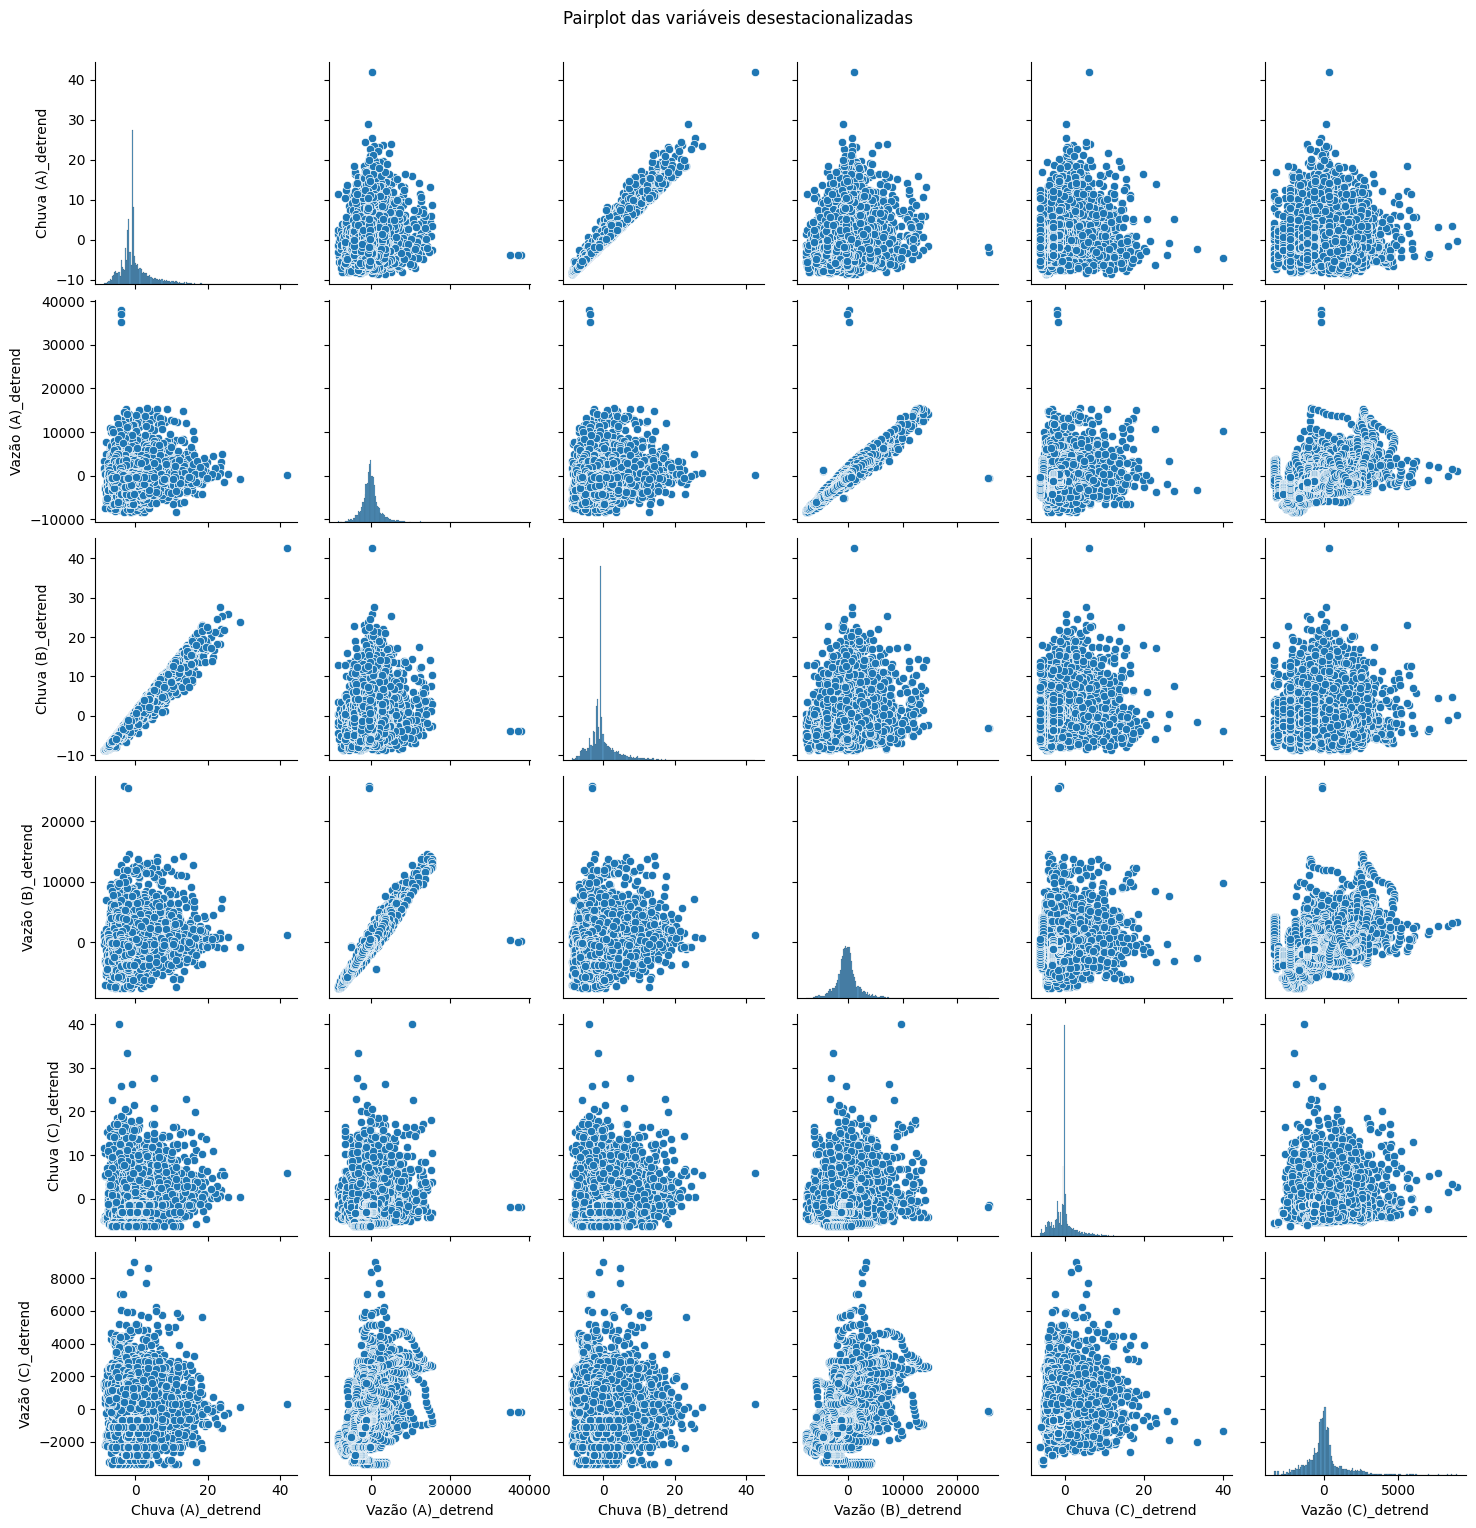

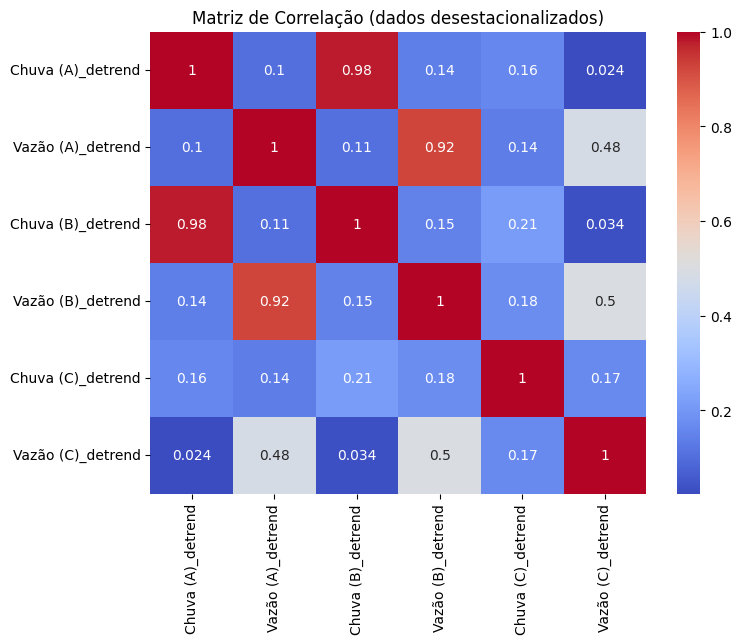

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Carregar o arquivo Excel, pulando a primeira linha de metadados e definindo os cabeçalhos corretamente
df = pd.read_excel(
    'Teste Prático - IA.xlsx',
    skiprows=2,  # Pular as duas primeiras linhas (cabeçalhos antigos)
    header=0,    # Usar a próxima linha como cabeçalho ("Datas", "Chuva", "Vazão", ...)
    usecols="A:G",  # Selecionar apenas as colunas relevantes (A a G)
)


df.columns = [
    'Datas', 
    'Chuva (A)', 'Vazão (A)', 
    'Chuva (B)', 'Vazão (B)', 
    'Chuva (C)', 'Vazão (C)'
]


df['Datas'] = pd.to_datetime(df['Datas'], infer_datetime_format=True, dayfirst=True, errors='coerce')


df['Datas'] = df['Datas'].dt.strftime('%Y-%m-%d')

# Extrair o mês para potencial análise de sazonalidade
df['Mês'] = pd.to_datetime(df['Datas']).dt.month

# 2. Desestacionalizar os dados removendo a média mensal
# Essa etapa diminui a influência dos padrões sazonais, visto que os meses (como picos de chuva) são uma variável externa sujeita a mudanças climáticas.
for col in ['Chuva (A)', 'Vazão (A)', 'Chuva (B)', 'Vazão (B)', 'Chuva (C)', 'Vazão (C)']:
    df[col + '_detrend'] = df[col] - df.groupby('Mês')[col].transform('mean')

# Visualizar as primeiras linhas para conferir a transformação
print(df[['Datas', 'Mês', 'Chuva (A)_detrend', 'Vazão (A)_detrend', 'Chuva (B)_detrend', 'Vazão (B)_detrend', 'Chuva (C)_detrend', 'Vazão (C)_detrend']].head())

features = ['Vazão (A)_detrend', 'Vazão (B)_detrend', 'Vazão (C)_detrend']
df_pca = df.dropna(subset=features)  # Garantir que não haja valores faltantes
X = df_pca[features].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



#Visualizações
sns.pairplot(df_pca[['Chuva (A)_detrend', 'Vazão (A)_detrend', 'Chuva (B)_detrend', 'Vazão (B)_detrend', 'Chuva (C)_detrend', 'Vazão (C)_detrend']])
plt.suptitle("Pairplot das variáveis desestacionalizadas", y=1.02)
plt.show()


corr = df_pca[['Chuva (A)_detrend', 'Vazão (A)_detrend', 'Chuva (B)_detrend', 'Vazão (B)_detrend', 'Chuva (C)_detrend', 'Vazão (C)_detrend']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação (dados desestacionalizados)")
plt.show()